In [414]:
import sqlite3
import math 
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect("titanic_classification.db")
cursor = conn.cursor()

In [3]:
import sqlite3

conn = sqlite3.connect('titanic_classification.db')
cursor = conn.cursor()

cursor.execute("SELECT * FROM sqlite_master")
result = cursor.fetchall()

# Print active connections
for row in result:
    print(row)

('table', 'gender_submission', 'gender_submission', 3, 'CREATE TABLE "gender_submission" (\n"PassengerId" INTEGER,\n  "Survived" INTEGER\n)')
('table', 'test', 'test', 4, 'CREATE TABLE "test" (\n"PassengerId" INTEGER,\n  "Pclass" INTEGER,\n  "Name" TEXT,\n  "Sex" TEXT,\n  "Age" REAL,\n  "SibSp" INTEGER,\n  "Parch" INTEGER,\n  "Ticket" TEXT,\n  "Fare" REAL,\n  "Cabin" TEXT,\n  "Embarked" TEXT\n)')
('table', 'train', 'train', 13, 'CREATE TABLE "train" (\n"PassengerId" INTEGER,\n  "Survived" INTEGER,\n  "Pclass" INTEGER,\n  "Name" TEXT,\n  "Sex" TEXT,\n  "Age" REAL,\n  "SibSp" INTEGER,\n  "Parch" INTEGER,\n  "Ticket" TEXT,\n  "Fare" REAL,\n  "Cabin" TEXT,\n  "Embarked" TEXT\n)')


In [4]:
gender = pd.read_csv("C:/Users/vktof/Downloads/gender_submission.csv")
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
test = pd.read_csv("C:/Users/vktof/Downloads/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train = pd.read_csv("C:/Users/vktof/Downloads/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
gender.to_sql('gender_submission',conn,if_exists='replace', index=False,method="multi")

418

In [9]:
test.to_sql('test',conn,if_exists='replace', index=False,method="multi")

418

In [10]:
train.to_sql('train',conn,if_exists='replace', index=False,method="multi")

891

In [53]:
pd.read_sql_query("select * from test ",conn)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,None,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,None,S


In [140]:
cursor.execute('select name from sqlite_master where type="table" ')
for x in cursor:
    print(x)

('gender_submission',)
('test',)
('train',)
('train_dis',)


                               DROP TABLE TITIANIC

In [12]:
cursor.execute('DROP table titanic ')
for x in cursor:
    print(x)

OperationalError: no such table: titanic

                       FINDING HOW MANY COLUMN IN OUR TABLE        

In [13]:
cursor.execute('select COUNT(name) from PRAGMA_TABLE_INFO("gender_submission") ')
for x in cursor:
    print(x)

(2,)


                   FINDING COLUMN NAME,TYPE,LENGTH

In [14]:
cursor.execute('select name,type ,length(type) from PRAGMA_TABLE_INFO("gender_submission")')
for x in cursor:
    print(x)

('PassengerId', 'INTEGER', 7)
('Survived', 'INTEGER', 7)


In [15]:
cursor.execute('select name,type ,length(type) from PRAGMA_TABLE_INFO("test")')
for x in cursor:
    print(x)

('PassengerId', 'INTEGER', 7)
('Pclass', 'INTEGER', 7)
('Name', 'TEXT', 4)
('Sex', 'TEXT', 4)
('Age', 'REAL', 4)
('SibSp', 'INTEGER', 7)
('Parch', 'INTEGER', 7)
('Ticket', 'TEXT', 4)
('Fare', 'REAL', 4)
('Cabin', 'TEXT', 4)
('Embarked', 'TEXT', 4)


In [16]:
cursor.execute('select name,type ,length(type) from PRAGMA_TABLE_INFO("train")')
for x in cursor:
    print(x)

('PassengerId', 'INTEGER', 7)
('Survived', 'INTEGER', 7)
('Pclass', 'INTEGER', 7)
('Name', 'TEXT', 4)
('Sex', 'TEXT', 4)
('Age', 'REAL', 4)
('SibSp', 'INTEGER', 7)
('Parch', 'INTEGER', 7)
('Ticket', 'TEXT', 4)
('Fare', 'REAL', 4)
('Cabin', 'TEXT', 4)
('Embarked', 'TEXT', 4)


#        CHECK IS THERE ANY NULL VALUE IN OUR TABLE

In [8]:
#gender.isnull().sum() # by python method
#cursor.execute("select PassengerId ,Survived from gender_submission where PassengerId is not null  or Survived is not null limit 5")
#for x in cursor:
 #   print(x)
cursor.execute("select Age ,Cabin from train where Age is null and Cabin is null  limit 10")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Age', 'Cabin']
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [9]:
#test.isnull().sum() # by python method
cursor.execute("select PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked from test where  \
               PassengerId is null or Pclass is  null  or Name is null or Sex is null or Age is null  or Sibsp is not null or \
                  Parch is null  or Ticket is null or Fare is null  or Cabin is  null or Embarked is  null limit 5 ")
for x in cursor:
   print(x)

(892, 3, 'Kelly, Mr. James', 'male', 34.5, 0, 0, '330911', 7.8292, None, 'Q')
(893, 3, 'Wilkes, Mrs. James (Ellen Needs)', 'female', 47.0, 1, 0, '363272', 7.0, None, 'S')
(894, 2, 'Myles, Mr. Thomas Francis', 'male', 62.0, 0, 0, '240276', 9.6875, None, 'Q')
(895, 3, 'Wirz, Mr. Albert', 'male', 27.0, 0, 0, '315154', 8.6625, None, 'S')
(896, 3, 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)', 'female', 22.0, 1, 1, '3101298', 12.2875, None, 'S')


In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [25]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
cursor.execute('select count() from gender_submission')  
for x in cursor:
    print(x)

(418,)


In [29]:
cursor.execute('select count() from train')  
for x in cursor:
    print(x)

(891,)


In [30]:
cursor.execute('select sum(Passengerid)/count() from gender_submission')  # mean 
for x in cursor:
    print(x)

(1100,)


In [90]:
query='select min(Passengerid) from gender_submission'  # mean
cursor.execute(query)
result= cursor.fetchone()
if result:
    print("minmimum value:", result[0])
else:
    print("No results found")


minmimum value: 892


#                               Visulization for GENDER SUBMISSION
## Heat Map Between Survived And Passenger
### Correlation

In [11]:
gender.corr()

,PassengerId,Survived
PassengerId,1.000000,-0.023245
Survived,-0.023245,1.000000


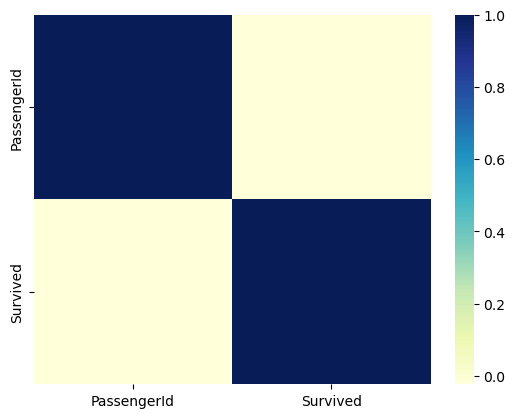

In [64]:
sns.heatmap(gender.corr(),cmap="YlGnBu")   #gender_submission
plt.show()

## how many people survived in gender submision tabel

In [24]:
cursor.execute('select sum(Survived) survived, sum(1- Survived) as dead from gender_submission')  
result = cursor.fetchall()
print("survived , dead;",result[0])
for x in cursor:
    print(x)

survived , dead; (152, 266)


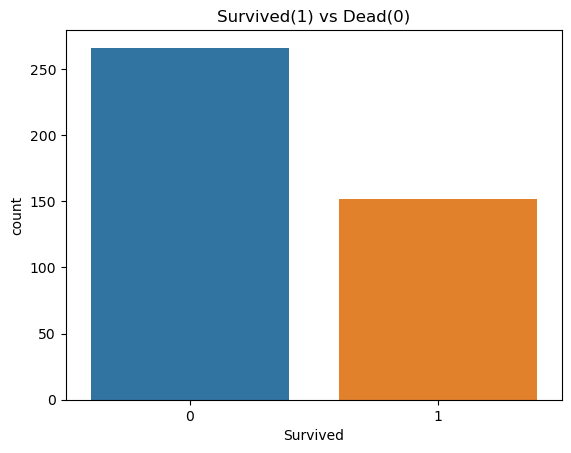

In [27]:
sns.countplot(data=gender, x ="Survived")
plt.title("Survived(1) vs Dead(0)")
plt.show()

# Test
#                              Visulization for Test Table

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


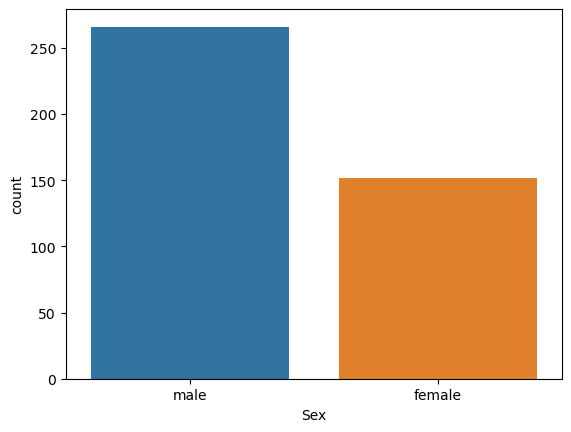

In [26]:
sns.countplot(data = test , x= "Sex")                     
plt.show()

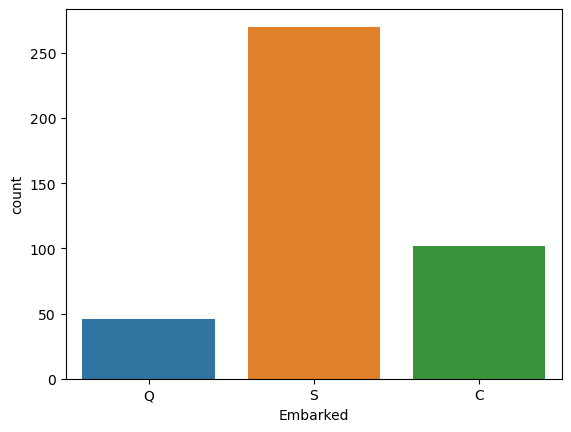

In [29]:
sns.countplot(data = test, x= "Embarked")                    
plt.show()

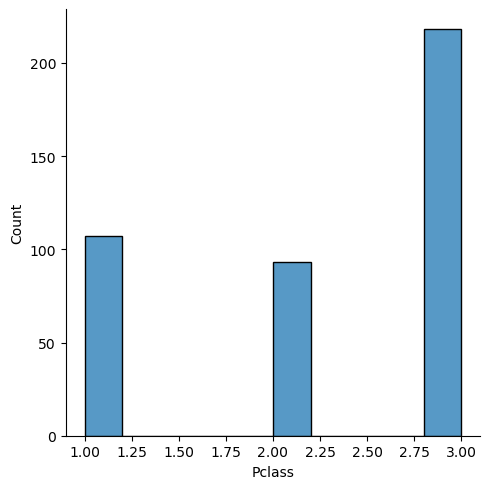

In [30]:
sns.displot(test["Pclass"])

## Duplicate
### Lets find out is there any duplicate if yes than delete duplicate

In [29]:
pd.read_sql_query("SELECT Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked, COUNT(*)  \
               FROM test \
                  GROUP BY Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked HAVING COUNT(*)>1",conn)                  

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,COUNT(*)


In [37]:
pd.read_sql_query("SELECT Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked, COUNT(*)  \
               FROM train \
                  GROUP BY Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked HAVING COUNT(*)>1",conn) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,COUNT(*)


#### To predict whether is a particular person survived based on the information provided in the train dataset.

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#           Filling cabin column with '0' where cabin is NaN 

In [40]:
cursor.execute("select coalesce(Cabin, 'null' ) as cabin from train where  Cabin is null limit 5")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['cabin']
('null',)
('null',)
('null',)
('null',)
('null',)


In [41]:
cursor.execute("UPDATE train SET Cabin = coalesce(Cabin, 'null' )" )

In [42]:
cursor.execute("select Cabin from train limit 10")
for x in cursor:
    print(x)

('null',)
('C85',)
('null',)
('C123',)
('null',)
('null',)
('E46',)
('null',)
('null',)
('null',)


In [43]:
cursor.execute("UPDATE train SET Cabin = 0 WHERE Cabin= 'null'")


In [44]:
cursor.execute("select Cabin from train limit 10")
for x in cursor:
    print(x)

('0',)
('C85',)
('0',)
('C123',)
('0',)
('0',)
('E46',)
('0',)
('0',)
('0',)


# Train
   ### lets divived train dataset into numerical and categorical 

In [72]:
cursor.execute('select sum(Survived) survived, sum(1- Survived) as dead from gender_submission')  
result = cursor.fetchall()
print("survived , dead;",result[0])
for x in cursor:
    print(x)

survived , dead; (342, 549)


#### Total Survived = 342
#### total dead= 549

In [75]:
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat= train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [88]:
df_num ="select  Age,SibSp,Parch,Fare from train limit 5 "
cursor.execute(df_num)
result = cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Age', 'SibSp', 'Parch', 'Fare']
(22.0, 1, 0, 7.25)
(38.0, 1, 0, 71.2833)
(26.0, 0, 0, 7.925)
(35.0, 1, 0, 53.1)
(35.0, 0, 0, 8.05)


In [90]:
df_cat ="select  Survived,Pclass,Sex,Ticket,Cabin,Embarked from train limit 5 "
cursor.execute(df_cat)
result = cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
(0, 3, 'male', 'A/5 21171', None, 'S')
(1, 1, 'female', 'PC 17599', 'C85', 'C')
(1, 3, 'female', 'STON/O2. 3101282', None, 'S')
(1, 1, 'female', '113803', 'C123', 'S')
(0, 3, 'male', '373450', None, 'S')


# Count
## Creating histrogram graph for each and every numerical data [Age,SibSp,Parch,Fare]

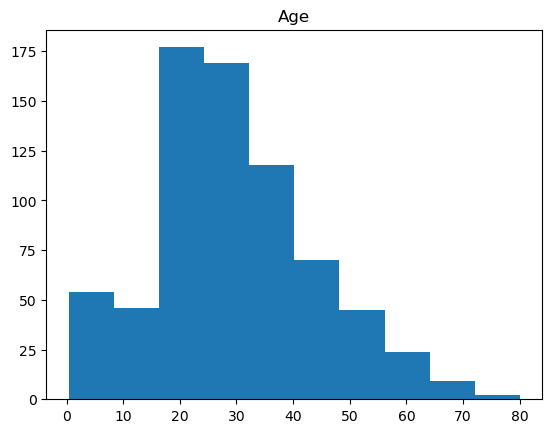

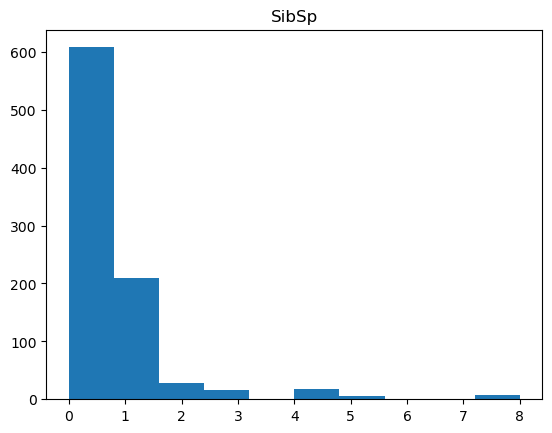

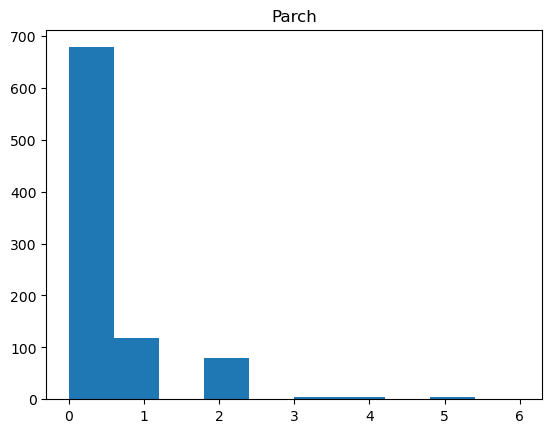

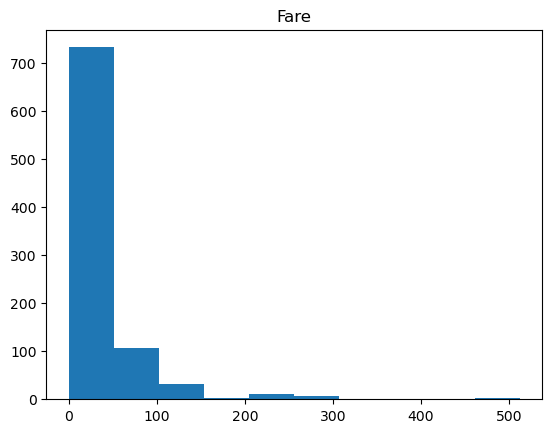

In [94]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

### Creating Heatmap Graph for Numeric Data

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

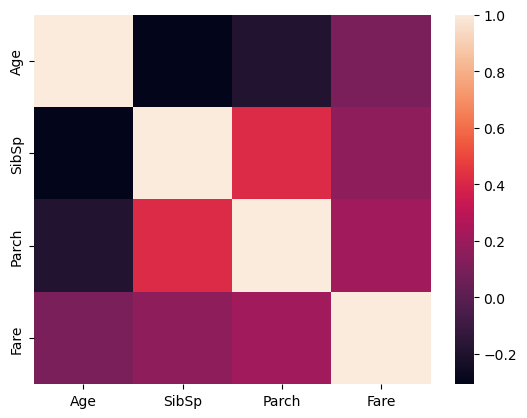

In [87]:
print(df_num.corr())
sns.heatmap(df_num.corr())

# Count
## Creating Bar Plot  for each and every data in  Categorical data .
  ### Using two method
   #### 1. By barplot
   #### 2. By countplot      

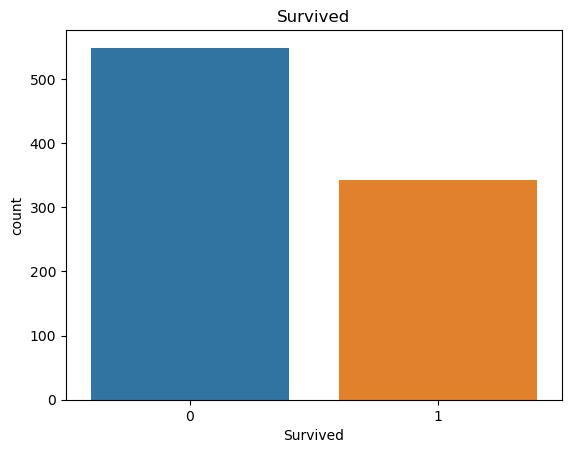

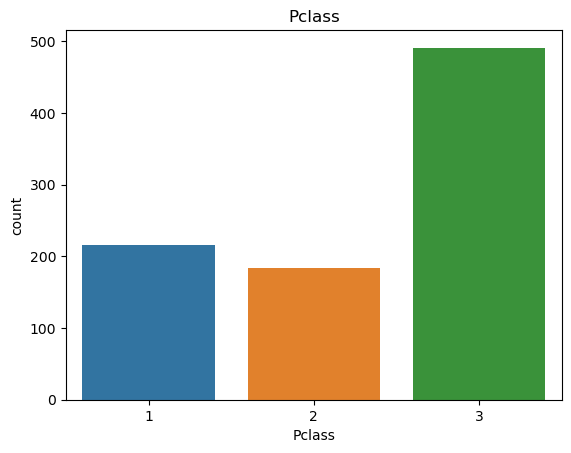

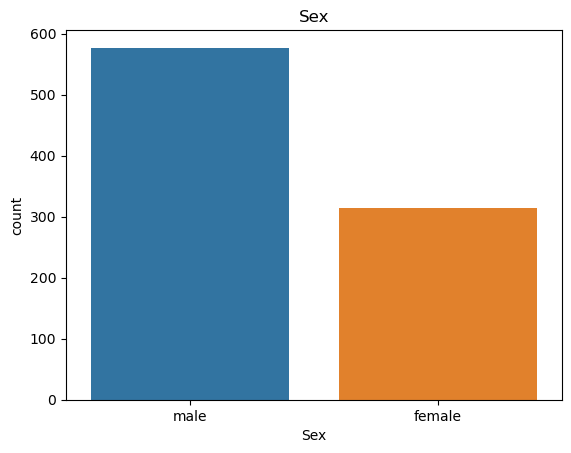

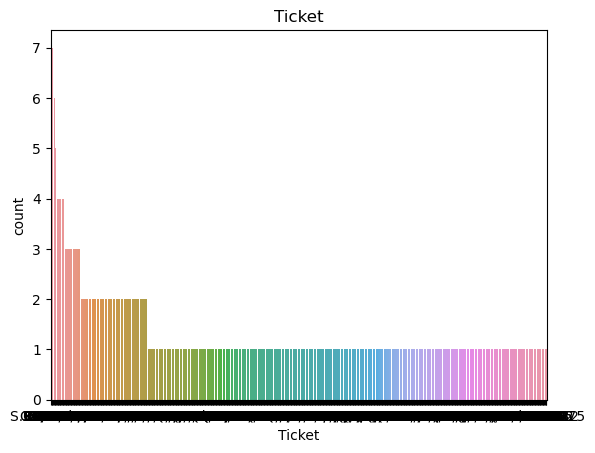

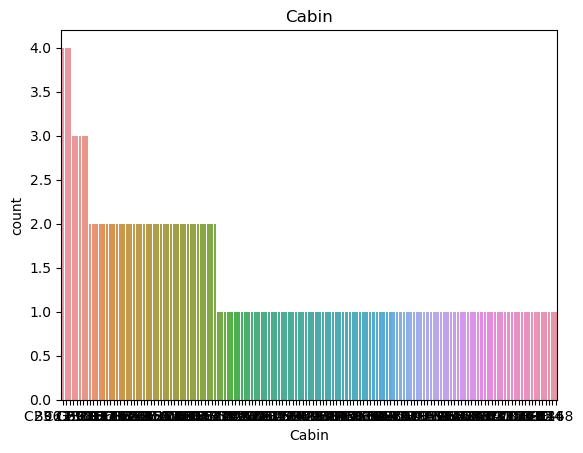

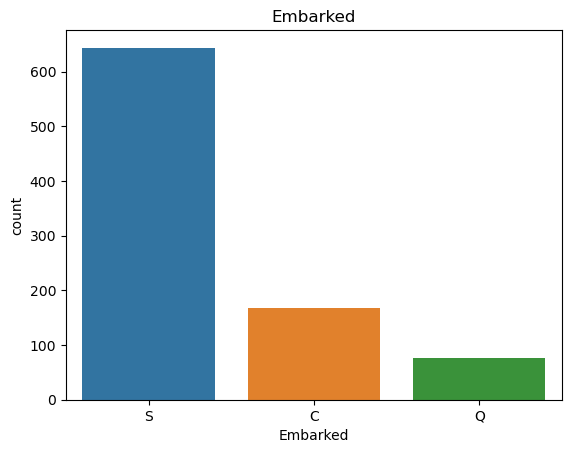

In [78]:
for i in df_cat.columns:
    sns.barplot(x= df_cat[i].value_counts().index,y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()        

<Axes: xlabel='Pclass', ylabel='Density'>

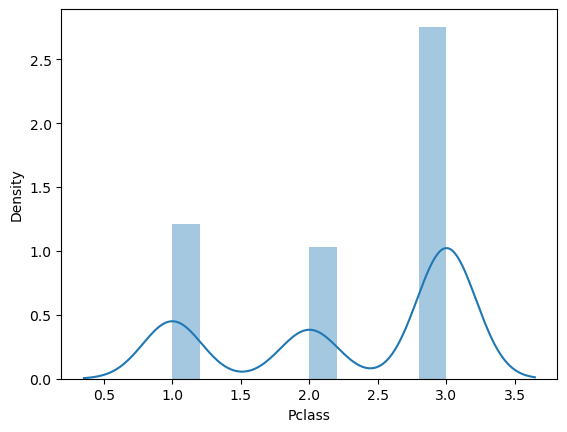

In [81]:
sns.distplot( train['Pclass'] )

##### the values are numerical (1, 2 and 3), but they are also categories. Because a person in 3rd class doesn't necessarily equal a passenger in 2nd class + 1st class. (This doesn't make sense dose it?)

Sex: female  male 0    314
1    577
Name: sex, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

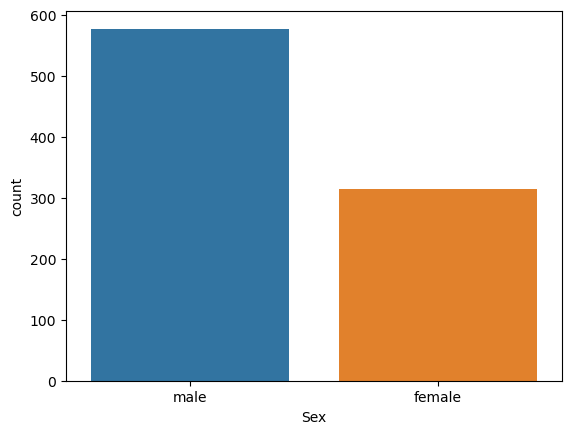

In [89]:
result2 = pd.read_sql_query("select Sex,count(Sex) as sex from train group by Sex",conn)
plt.show()
print("Sex: female  male",result2['sex'])
sns.countplot(data = train , x= 'Sex' )


<Axes: xlabel='Embarked', ylabel='count'>

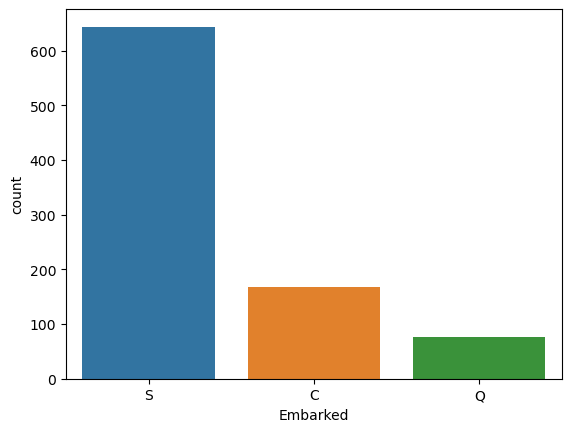

In [90]:
sns.countplot(data = train , x= 'Embarked' )

##  Compare survival rate across   Age,sibsp,parch and fare  
### 1. by pandas 
### 2. Sql 

In [94]:
#compare survival rate across Age,sibsp,parch and fare
pd.pivot_table(train,index= 'Survived',values =['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [92]:
cursor.execute("select Survived, round(Avg(Age),6)Age,round(Avg(SibSp),6)SibSp,round(Avg(Parch),6)Prach,round(Avg(Fare),6)Fare  from train group by Survived")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survived', 'Age', 'SibSp', 'Prach', 'Fare']
(0, 30.626179, 0.553734, 0.32969, 22.117887)
(1, 28.34369, 0.473684, 0.464912, 48.395408)


 ##  Compare survival rate across  Pclass,Sex,Parch,SibSp
### SQL

In [99]:
df_cat.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


### Pclass
### Calculated Avg of survived  for each Pclass


In [95]:
cursor.execute("select round(AVG(Survived),6)Survived, Pclass  from train  group by Pclass")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survived', 'Pclass']
(0.62963, 1)
(0.472826, 2)
(0.242363, 3)


#### Calculated Avg of survived  for Pclass

In [53]:
cursor.execute("select AVG(Pclass) Pclass,Survived from train  group by Survived")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)  

['Pclass', 'Survived']
(2.5318761384335153, 0)
(1.9502923976608186, 1)


In [56]:
cursor.execute("select Survived , Pclass,count(Pclass)  as count from train group by Survived , Pclass order by Pclass")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survived', 'Pclass', 'count']
(0, 1, 80)
(1, 1, 136)
(0, 2, 97)
(1, 2, 87)
(0, 3, 372)
(1, 3, 119)


## Sex[F/M]
### Calculated Avg of survived  for female And male

In [93]:
cursor.execute("select AVG(Survived)Survied, Sex from train  group by Sex")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survied', 'Sex']
(0.7420382165605095, 'female')
(0.18890814558058924, 'male')


## SibSp
  ### *Finding total  survived and dead of siblings

In [54]:
cursor.execute("select AVG(SibSp) SibSp,Survived from train  group by Survived")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)   

['SibSp', 'Survived']
(0.5537340619307832, 0)
(0.47368421052631576, 1)


### *Calculated Avg of survived  for each SibSp[0,1,2,3,4,5,6]

In [104]:
cursor.execute("select AVG(Survived)Survied, SibSp from train  group by SibSp")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)  

['Survied', 'SibSp']
(0.34539473684210525, 0)
(0.5358851674641149, 1)
(0.4642857142857143, 2)
(0.25, 3)
(0.16666666666666666, 4)
(0.0, 5)
(0.0, 8)


## Parch
### Calculated Total survived and dead   for each Parch

In [52]:
cursor.execute("select AVG(Parch) Parch,Survived from train  group by Survived")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)  

['Parch', 'Survived']
(0.3296903460837887, 0)
(0.4649122807017544, 1)


In [51]:
cursor.execute("select  AVG(Survived)Survied, Parch from train group by Parch")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survied', 'Parch']
(0.34365781710914456, 0)
(0.5508474576271186, 1)
(0.5, 2)
(0.6, 3)
(0.0, 4)
(0.2, 5)
(0.0, 6)


  ### Compare survival Pclass

In [57]:
cursor.execute("select Survived , Pclass,count(Pclass)  as count from train group by Survived , Pclass order by Pclass")
result= cursor.fetchall()
colum_name = [col[0] for col in cursor.description]
print( colum_name)
for x in result:
    print(x)

['Survived', 'Pclass', 'count']
(0, 1, 80)
(1, 1, 136)
(0, 2, 97)
(1, 2, 87)
(0, 3, 372)
(1, 3, 119)


In [107]:
pd.read_sql_query("select Survived , Pclass,count(Pclass) as count  from train group by Survived , Pclass order by Pclass",conn)

,Survived,Pclass,count
0,0,1,80
1,1,1,136
2,0,2,97
3,1,2,87
4,0,3,372
5,1,3,119


   ### Compare survival sex

In [108]:
pd.read_sql_query("select Survived,Sex,count(Sex) as count  from train group by Survived , Sex order by Sex",conn)

,Survived,Sex,count
0,0,female,81
1,1,female,233
2,0,male,468
3,1,male,109


In [109]:
pd.read_sql_query("select Survived,Embarked,count(Embarked) as count  from train  where Embarked is not null \
                  group by Survived ,Embarked order by Embarked",conn)

,Survived,Embarked,count
0,0,C,75
1,1,C,93
2,0,Q,47
3,1,Q,30
4,0,S,427
5,1,S,217


## Cabin 
### Cabin- Simplify cabins(evaluated if cabin letter(cabin_adv) or the  purchase of tickets across multiple cabin (cabin_multiple) impacted survival        

In [132]:
cabin_multiple=pd.read_sql_query("select distinct(count(Cabin))as cabin_multiple from train group by Cabin",conn)
cabin_multiple

,cabin_multiple
0,0
1,1
2,2
3,4
4,3


In [133]:
pd.read_sql_query("select Survived,Cabin_multiple,count(Ticket) from (select distinct(count(Cabin))as cabin_multiple,Survived,Ticket  from train group by Cabin)  group by Survived,cabin_multiple ",conn)

,Survived,cabin_multiple,count(Ticket)
0,0,0,1
1,0,1,41
2,0,2,8
3,0,3,3
4,0,4,1
5,1,1,49
6,1,2,30
7,1,3,2
8,1,4,2


In [58]:
cursor.execute("select  Cabin from train limit 5")
for x in cursor:
      print(x)

('0',)
('C85',)
('0',)
('C123',)
('0',)


In [59]:
multiple_cabin = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split (' ')))
multiple_cabin.value_counts()

Cabin
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [60]:
cabin_letter = train.Cabin.apply(lambda x:str(x)[0])
cabin_letter.value_counts()

Cabin
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

## Ticket 

In [61]:
numeric_ticket= train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
numeric_ticket.head(5)

0    0
1    0
2    0
3    1
4    1
Name: Ticket, dtype: int64

In [62]:
letter_ticket=train.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace
                   ('/','').lower() if len(x.split(' ')[:-1])> 0 else 0)
letter_ticket.head(5)

0        a5
1        pc
2    stono2
3         0
4         0
Name: Ticket, dtype: object

In [63]:
letter_ticket.value_counts()

Ticket
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [64]:
numeric_ticket.value_counts()         

Ticket
1    661
0    230
Name: count, dtype: int64

In [65]:
cursor.execute("""
    SELECT Ticket, 
           CASE 
               WHEN Ticket GLOB '[0-9]*' THEN 1
               ELSE 0
           END AS numeric_ticket
    FROM train limit 5;
""")
result = cursor.fetchall()
for row in result:
    print(row)

('A/5 21171', 0)
('PC 17599', 0)
('STON/O2. 3101282', 0)
('113803', 1)
('373450', 1)


# Survivors and non-survivors by sex
### Createing a SQL Query to retrieve Data And Execute the query and fetch the results


# Survived

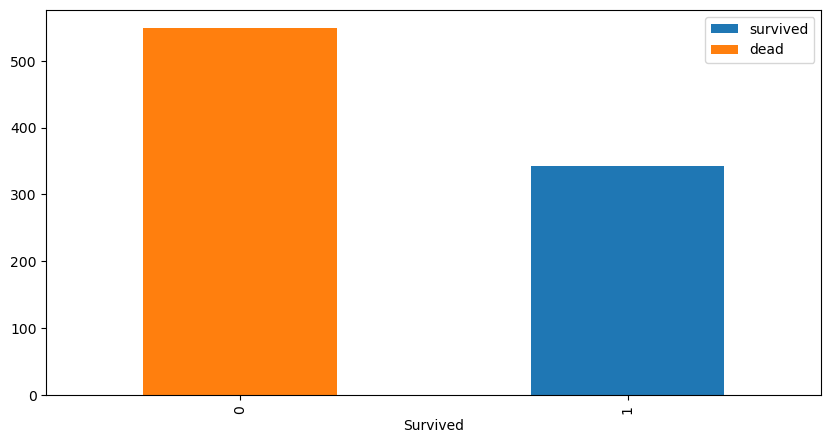

survived; 0      0
1    342
Name: survived, dtype: int64
dead; 0    549
1      0
Name: dead, dtype: int64


In [77]:
result2 = pd.read_sql_query("select Survived,sum(Survived) survived,sum(1-survived) dead from train group by Survived",conn)
result2.set_index("Survived").plot(kind='bar',stacked = True,figsize=(10,5))
plt.show()
print("survived;",result2['survived'])
print("dead;",result2['dead'])

# Sex
## *Plot the data And Print the counts of survivors and non-survivors by sex

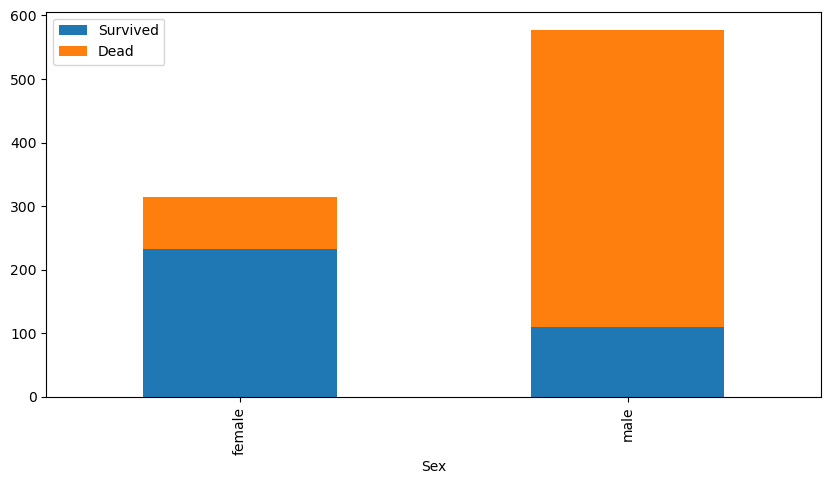

Survived:
 0    233
1    109
Name: Survived, dtype: int64
Dead:
 0     81
1    468
Name: Dead, dtype: int64


In [70]:
query = '''
    SELECT Sex, SUM(Survived) AS Survived, SUM(1 - Survived) AS Dead
    FROM train
    GROUP BY Sex
'''
results = pd.read_sql_query(query, conn)

# Plot the data
results.set_index('Sex').plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

# Print the counts of survivors and non-survivors by sex
print("Survived:\n", results['Survived'])
print("Dead:\n", results['Dead'])


### **In above Graph its clearly shows that number of survival of female are  more than men.

# Embarked
## Survivors and non-survivors by Embarked 
### 1. Createing a SQL Query to retrieve Data And Execute the query and fetch the results. 
### 2. Plot Bar graph of  the data And Print the counts of survivors and non-survivors by Embarked.

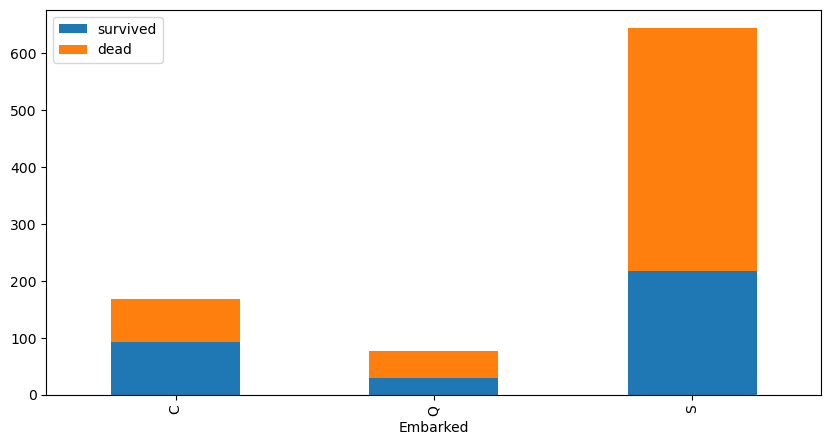

Survived: 0     93
1     30
2    217
Name: survived, dtype: int64
dead: 0     75
1     47
2    427
Name: dead, dtype: int64


In [91]:
query= 'select Embarked,sum(Survived) survived ,sum(1-survived) dead  from train where Embarked is not null group by Embarked '
results = pd.read_sql_query(query,conn)
results.set_index("Embarked").plot(kind = 'bar',stacked = True,figsize= (10,5))
plt.show()
print('Survived:',results['survived'])
print('dead:',results['dead'])

   ### In above graph
   #### The Chart confirms a person aboarded from C slightly more likely survived.
   #### The Chart confirms a person aboarded from Q more likely dead.
   #### The Chart confirms a person aboarded from S more likely dead.

# Age

# Survivors and non-survivors by Age
#### 1. Createing a SQL Query to retrieve Data And Execute the query and fetch the results. 
#### 2. Plot histogram  graph of  the data And Print the counts of survivors and non-survivors by Age.

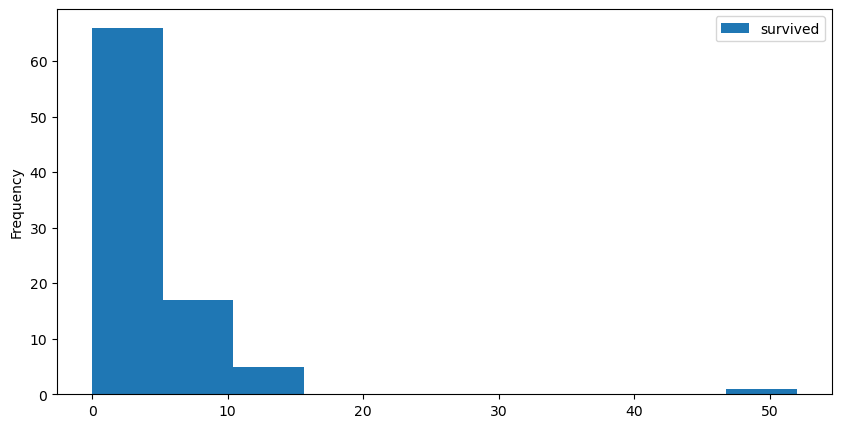

Age: 0     52
1      1
2      1
3      2
4      2
      ..
84     0
85     0
86     0
87     0
88     1
Name: survived, Length: 89, dtype: int64


In [86]:
result1=pd.read_sql_query('select Age,sum(Survived) survived  from train  group by Age',conn)
result1.set_index('Age').plot(kind="hist",stacked =True,figsize = (10,5))
plt.show()
print("Age:",result1['survived'])

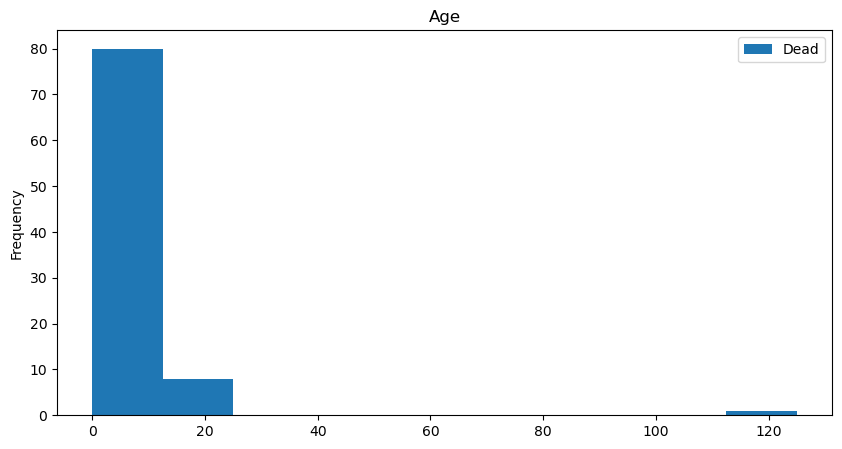

Age: 0     125
1       0
2       0
3       0
4       0
     ... 
84      2
85      1
86      2
87      1
88      0
Name: Dead, Length: 89, dtype: int64


In [90]:
result1=pd.read_sql_query('select Age,sum(1-Survived) Dead from train  group by Age',conn)
result1.set_index('Age').plot(kind="hist",stacked =True,figsize = (10,5))
plt.title("Age")
plt.show()
print("Age:",result1['Dead'])

# Age
## Survivors and non-survivors by Pclass
#### 1. Createing a SQL Query to retrieve Data And Execute the query and fetch the results. 
#### 2. Plot bar  graph of  the data And Print the counts of survivors and non-survivors by Pclass.

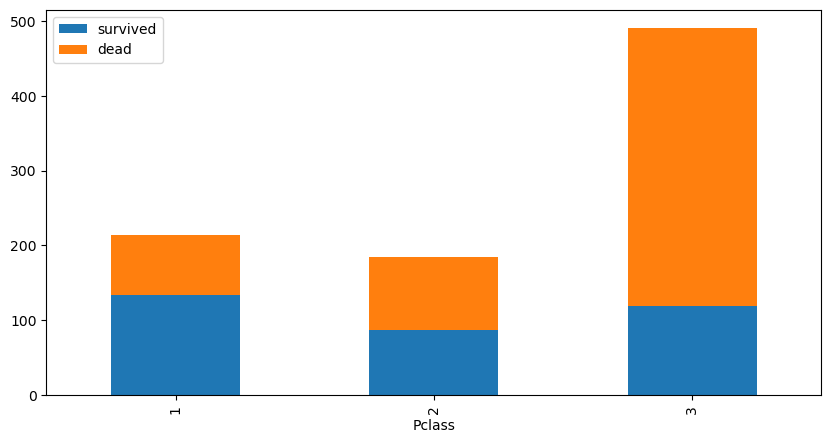

Survived: 0    134
1     87
2    119
Name: survived, dtype: int64
dead: 0     80
1     97
2    372
Name: dead, dtype: int64


In [84]:
query= 'select Pclass,sum(Survived) survived ,sum(1-survived) dead  from train where Embarked is not null group by Pclass '
results = pd.read_sql_query(query,conn)
results.set_index("Pclass").plot(kind = 'bar',stacked = True,figsize= (10,5))
plt.show()
print('Survived:',results['survived'])
print('dead:',results['dead'])

  ### it clearly show at above graph that pclass 3 has more dead as capmare to other pclass  and pclass 1 has more survived as compare to other

# SibSp
## Survivors and non-survivors by SibSp
#### 1. Createing a SQL Query to retrieve Data And Execute the query and fetch the results. 
#### 2. Plot histogram  graph of  the data And Print the counts of survivors and non-survivors by SibSp.

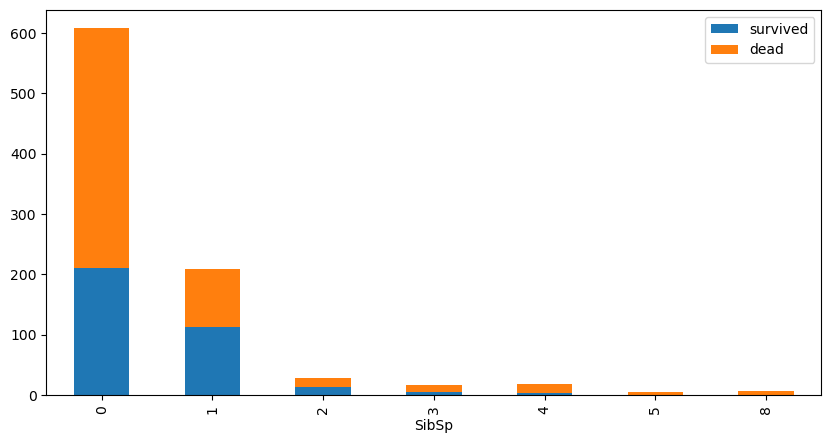

survived; 0    210
1    112
2     13
3      4
4      3
5      0
6      0
Name: survived, dtype: int64
dead; 0    398
1     97
2     15
3     12
4     15
5      5
6      7
Name: dead, dtype: int64


In [97]:
result2 = pd.read_sql_query("select SibSp,sum(Survived) survived,sum(1-survived) dead from train group by SibSp",conn)
result2.set_index("SibSp").plot(kind='bar',stacked = True,figsize=(10,5))
plt.show()
print("survived;",result2['survived'])
print("dead;",result2['dead'])

  #### this confirms that a person aboarded with more than 2 siblings or spouse more likely survived.
  #### The Chart confirms a person aboarded without siblings or spouse more likely dead

## Parch
# Survivors and non-survivors by Parch
#### 1. Createing a SQL Query to retrieve Data And Execute the query and fetch the results. 
#### 2. Plot histogram  graph of  the data And Print the counts of survivors and non-survivors by Parch.

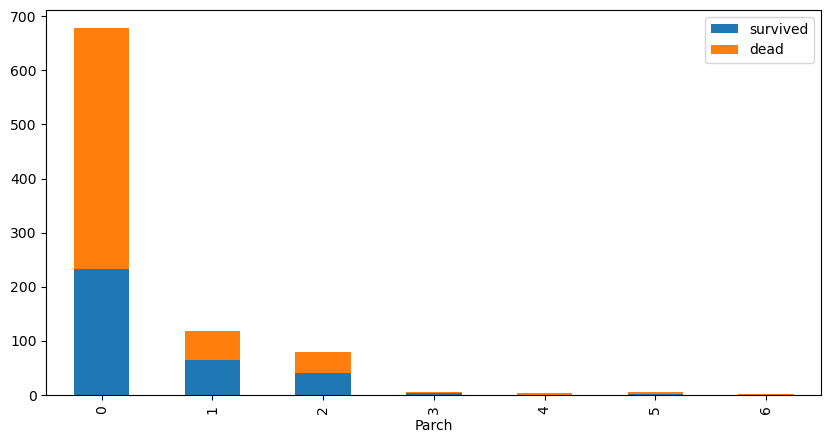

survived; 0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: survived, dtype: int64
dead; 0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: dead, dtype: int64


In [98]:
result2 = pd.read_sql_query("select Parch,sum(Survived) survived,sum(1-survived) dead from train group by Parch",conn)
result2.set_index("Parch").plot(kind='bar',stacked = True,figsize=(10,5))
plt.show()
print("survived;",result2['survived'])
print("dead;",result2['dead'])

 #### The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
 #### The Chart confirms a person aboarded alone more likely dead

## Creating new Table Train_Dis and train_con for  Machine Learning models

## Creating train_dis table which contain only discreate values

### using sql

In [165]:
# Define the name of the new table
new_table_name = 'train_dis'

# Create a new table with the same structure as the 'train' table
create_table_query = '''
CREATE TABLE {new_table} AS
SELECT Survived,Pclass,Sex,SibSp,Parch,Fare, Embarked FROM train
'''
# Execute the query to create the new table
conn.execute(create_table_query.format(new_table=new_table_name))


In [163]:
cursor.execute("drop table train_dis ")
for x in cursor:
    print(x)

In [345]:
cursor.execute("select name from sqlite_master where type='table' ")
for x in cursor:
    print(x)

('gender_submission',)
('test',)
('train',)
('train_dis',)


In [167]:
cursor.execute(" select * from  train_dis limit 5")
column_nm = [col[0] for col in cursor.description]
print(column_nm)
for x in cursor:
    print(x)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
(0, 3, 'male', 1, 0, 7.25, 'S')
(1, 1, 'female', 1, 0, 71.2833, 'C')
(1, 3, 'female', 0, 0, 7.925, 'S')
(1, 1, 'female', 1, 0, 53.1, 'S')
(0, 3, 'male', 0, 0, 8.05, 'S')


In [347]:
cursor.execute("update train_dis set Sex = 0 where Sex = 'male' ")
for x in cursor:
    print(x)

In [348]:
cursor.execute("update train_dis set Sex = 1 where Sex = 'female' ")
for x in cursor:
    print(x)

In [349]:
cursor.execute(" select * from  train_dis limit 5")
column_nm = [col[0] for col in cursor.description]
print(column_nm)
for x in cursor:
    print(x)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
(0, 3, '0', 1, 0, 7.25, 'S')
(1, 1, '1', 1, 0, 71.2833, 'C')
(1, 3, '1', 0, 0, 7.925, 'S')
(1, 1, '1', 1, 0, 53.1, 'S')
(0, 3, '0', 0, 0, 8.05, 'S')


In [352]:
pd.read_sql_query("select Fare, NTILE(4) OVER (ORDER BY Fare) from train limit 5",conn)

,Fare,NTILE(4) OVER (ORDER BY Fare)
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


### Using  Python

In [353]:
df_dis = pd.DataFrame() #For discretised continuous variables 
df_con = pd.DataFrame() #For continuous variables 

### We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

In [355]:
df_dis["Survived"]= train["Survived"]
df_con['Survived'] = train['Survived']

In [359]:
print("df_dis\n", df_dis)
print("df_con\n", df_con)

df_dis
      Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
df_con
      Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [360]:
df_dis['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [361]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3


df_con 
    Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3


### Since our Fare is a float, let's add it to our continuous subset dataframe. But to add to the categorical subset dataframe we will be cutting it to bins.

In [435]:
# Add Fare to our sbset dataframes
df_con['Fare'] = train['Fare']                  # --> Continuous

df_dis['Fare'] = pd.cut(train['Fare'], bins= 4)  # --> Discretised

In [436]:
print("df_dis \n", df_dis.head())
print("df_con \n", df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 128.082]        S
1         1       1    1      1      0  (-0.512, 128.082]        C
2         1       3    1      0      0  (-0.512, 128.082]        S
3         1       1    1      1      0  (-0.512, 128.082]        S
4         0       3    0      0      0  (-0.512, 128.082]        S
df_con 
    Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0         0       3    0      1      0   7.2500        S
1         1       1    1      1      0  71.2833        C
2         1       3    1      0      0   7.9250        S
3         1       1    1      1      0  53.1000        S
4         0       3    0      0      0   8.0500        S


In [373]:
df_dis["Sex"] =train["Sex"]
df_dis['Sex'] = np.where(df_dis['Sex'] == 'female',1,0)
df_con["Sex"] = train["Sex"]
df_con['Sex'] = np.where(df_con['Sex'] == 'female',1,0)

In [375]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 128.082]
1         1       1    1      1      0  (-0.512, 128.082]
2         1       3    1      0      0  (-0.512, 128.082]
3         1       1    1      1      0  (-0.512, 128.082]
4         0       3    0      0      0  (-0.512, 128.082]


df_con 
    Survived  Pclass  Sex  SibSp  Parch     Fare
0         0       3    0      1      0   7.2500
1         1       1    1      1      0  71.2833
2         1       3    1      0      0   7.9250
3         1       1    1      1      0  53.1000
4         0       3    0      0      0   8.0500


In [365]:
# Add SibSp to our sbset dataframes
df_dis['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [378]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 128.082]
1         1       1    1      1      0  (-0.512, 128.082]
2         1       3    1      0      0  (-0.512, 128.082]
3         1       1    1      1      0  (-0.512, 128.082]
4         0       3    0      0      0  (-0.512, 128.082]


df_con 
    Survived  Pclass  Sex  SibSp  Parch     Fare
0         0       3    0      1      0   7.2500
1         1       1    1      1      0  71.2833
2         1       3    1      0      0   7.9250
3         1       1    1      1      0  53.1000
4         0       3    0      0      0   8.0500


In [367]:
# Add Parch to our sbset dataframes
df_dis['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [377]:
print('df_dis \n',df_dis.head())
print('')
print('')
print('df_con \n',df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 128.082]
1         1       1    1      1      0  (-0.512, 128.082]
2         1       3    1      0      0  (-0.512, 128.082]
3         1       1    1      1      0  (-0.512, 128.082]
4         0       3    0      0      0  (-0.512, 128.082]


df_con 
    Survived  Pclass  Sex  SibSp  Parch     Fare
0         0       3    0      1      0   7.2500
1         1       1    1      1      0  71.2833
2         1       3    1      0      0   7.9250
3         1       1    1      1      0  53.1000
4         0       3    0      0      0   8.0500


In [384]:
# Add embarked to the sub dataframes
df_con['Embarked'] = train['Embarked']
df_dis['Embarked'] = train['Embarked'] 

In [387]:
# Remove the missing values.
df_con.dropna(subset= ['Embarked'],inplace= True)
df_dis.dropna(subset= ['Embarked'],inplace= True)

In [388]:
print("df_dis \n", df_dis.head())
print("df_con \n", df_con.head())

df_dis 
    Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 128.082]        S
1         1       1    1      1      0  (-0.512, 128.082]        C
2         1       3    1      0      0  (-0.512, 128.082]        S
3         1       1    1      1      0  (-0.512, 128.082]        S
4         0       3    0      0      0  (-0.512, 128.082]        S
df_con 
    Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0         0       3    0      1      0   7.2500        S
1         1       1    1      1      0  71.2833        C
2         1       3    1      0      0   7.9250        S
3         1       1    1      1      0  53.1000        S
4         0       3    0      0      0   8.0500        S


### Discreate dataframe
#### One Hot Encoded df_dis variables

In [396]:
# One Hot Encoded df_dis variables
one_hot_cols = df_dis.columns.tolist()
one_hot_cols.remove('Survived')                             # --> Here we remove Survived because we dont need encode this.
df_dis_enc = pd.get_dummies(df_dis, columns= one_hot_cols)

df_dis_enc.head().astype(int)

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 128.082]","Fare_(128.082, 256.165]","Fare_(256.165, 384.247]","Fare_(384.247, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Continous Dataframe

In [397]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [399]:
from sklearn.preprocessing import LabelEncoder

# Label Encoded using LabelEncoder()
label_encoder = LabelEncoder()

In [400]:
# Label Encoded using LabelEncoder()                         
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,0,1,0,18,2
1,1,0,1,1,0,207,0
2,1,2,1,0,0,41,2
3,1,0,1,1,0,189,2
4,0,2,0,0,0,43,2
5,0,2,0,0,0,51,1
6,0,0,0,0,0,186,2
7,0,2,0,3,1,124,2
8,1,2,1,0,2,74,2
9,1,1,1,1,0,154,0


## Start Building Maching Learning Models

#### first we use continous dataframe for simplicity

In [402]:
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,0,1,0,18,2
1,1,0,1,1,0,207,0
2,1,2,1,0,0,41,2
3,1,0,1,1,0,189,2
4,0,2,0,0,0,43,2


In [404]:
# Split the dataframe into features (predictive variables) and labels (target variable).
X_train = df_con_enc.drop('Survived', axis= 1)      # --> Features
y_train = df_con_enc['Survived']  

In [407]:
y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [408]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,0,1,0,18,2
1,0,1,1,0,207,0
2,2,1,0,0,41,2
3,0,1,1,0,189,2
4,2,0,0,0,43,2


### Model 1: Logistic Regression

#### In any model building, we mainly focus on 3 main steps:

Fitting the model and finding the accuracy (accuracy score) of the fitted model.
Perform K-Fold Cross Validation (K needs to be specified).
Find the accuracy of the Cross Validation.

In [420]:
import time
import datetime
start_time = time.time()
algorithm = LogisticRegression()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
log_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
log_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
log_acc_cv = round(metrics.accuracy_score(y_train, log_train_pred)*100, 2)

log_time = (time.time()- start_time)

In [418]:
log_time

0.1216740608215332

In [421]:
# Logistic Regression
print('Accuracy of the model is: ', log_acc)
print('Accuracy of 10-Fold CV is: ', log_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= log_time))

Accuracy of the model is:  79.42
Accuracy of 10-Fold CV is:  78.18
Running time is:  0:00:00.112686


### Model 2: Gaussian Naive Bayes

In [423]:
start_time = time.time()
algorithm = GaussianNB()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
gnb_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
gnb_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
gnb_acc_cv = round(metrics.accuracy_score(y_train, gnb_train_pred)*100, 2)

gnb_time = (time.time()- start_time)
# Gaussian Naive Bayes
print('Accuracy of the model is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gnb_time))

Accuracy of the model is:  76.72
Accuracy of 10-Fold CV is:  76.38
Running time is:  0:00:00.036932


### Model 3: K-Nearest Neighbours

In [424]:
start_time = time.time()
algorithm = KNeighborsClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
knn_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
knn_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
knn_acc_cv = round(metrics.accuracy_score(y_train, knn_train_pred)*100, 2)

knn_time = (time.time()- start_time)
# K-Nearest Neighbours
print('Accuracy of the model is: ', knn_acc)
print('Accuracy of 10-Fold CV is: ', knn_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= knn_time))

Accuracy of the model is:  76.72
Accuracy of 10-Fold CV is:  74.58
Running time is:  0:00:00.102757


### Model 4: Linear Support Vector Machines (SVC)

In [425]:
start_time = time.time()
algorithm = LinearSVC()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
svc_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
svc_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
svc_acc_cv = round(metrics.accuracy_score(y_train, svc_train_pred)*100, 2)

svc_time = (time.time()- start_time)
# Linear Support Vector Machines
print('Accuracy of the model is: ', svc_acc)
print('Accuracy of 10-Fold CV is: ', svc_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= svc_time))

Accuracy of the model is:  78.63
Accuracy of 10-Fold CV is:  67.94
Running time is:  0:00:00.147936


### Model 5: Stochastic Gradient Descent

In [426]:
start_time = time.time()
algorithm = SGDClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
SGD_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
SGD_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
SGD_acc_cv = round(metrics.accuracy_score(y_train, SGD_train_pred)*100, 2)

SGD_time = (time.time()- start_time)
# Stochastic Gradient Descent
print('Accuracy of the model is: ', SGD_acc)
print('Accuracy of 10-Fold CV is: ', SGD_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= SGD_time))

Accuracy of the model is:  62.09
Accuracy of 10-Fold CV is:  65.69
Running time is:  0:00:00.045910


### Model 6: Decision Tree Classifier

In [427]:
start_time = time.time()
algorithm = DecisionTreeClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
dt_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
dt_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
dt_acc_cv = round(metrics.accuracy_score(y_train, dt_train_pred)*100, 2)

dt_time = (time.time()- start_time)
#  Decision Tree Classifier
print('Accuracy of the model is: ', dt_acc)
print('Accuracy of 10-Fold CV is: ', dt_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= dt_time))

Accuracy of the model is:  92.46
Accuracy of 10-Fold CV is:  79.53
Running time is:  0:00:00.067819


### Model 7: Gradient Boost Trees

In [428]:
start_time = time.time()
algorithm = GradientBoostingClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
gbt_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
gbt_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
gbt_acc_cv = round(metrics.accuracy_score(y_train, gbt_train_pred)*100, 2)

gbt_time = (time.time()- start_time)
#  Decision Tree Classifier
print('Accuracy of the model is: ', gbt_acc)
print('Accuracy of 10-Fold CV is: ', gbt_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gbt_time))

Accuracy of the model is:  86.39
Accuracy of 10-Fold CV is:  81.1
Running time is:  0:00:00.587106


## RESULT

In [429]:
cv_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes', 
                                'Linear Support Vector Machines (SVC)', 'Stochastic Gradient Descent', 
                                'Decision Tree Classifier', 'Gradient Boost Trees'],
                      'Score':[log_acc_cv, knn_acc_cv, gnb_acc_cv, svc_acc_cv, SGD_acc_cv, dt_acc_cv, gbt_acc_cv
                               ]})

print('Cross-Validation Accuracy Scores')
cv_models.nlargest(8,'Score')

Cross-Validation Accuracy Scores


,Model,Score
6,Gradient Boost Trees,81.10
5,Decision Tree Classifier,79.53
0,Logistic Regression,78.18
2,Gaussian Naive Bayes,76.38
1,K-Nearest Neighbours,74.58
3,Linear Support Vector Machines (SVC),67.94
4,Stochastic Gradient Descent,65.69


### We can see that Gradient Boost Trees	 model has the best result. Since guessing would give us 50% accuracy (0 or 1), getting under 81% is pretty good.

#### Gradient Boost Trees is more robust than the .fit() model as it does multiple passes over the data instead of one.

## test
### adding 0 in column in Cabin where column has null value

In [211]:
cursor.execute("update test set Cabin = coalesce(Cabin,'null')")
for x in cursor:
    print(x)

In [205]:
cursor.execute("UPDATE test SET Cabin = 0 WHERE Cabin= 'null' ")
for x in cursor:
    print(x)

In [212]:
cursor.execute("select * from test limit 5 ")
for x in cursor:
    print(x)

(892, 3, 'Kelly, Mr. James', 'male', 34.5, 0, 0, '330911', 7.8292, '0', 'Q')
(893, 3, 'Wilkes, Mrs. James (Ellen Needs)', 'female', 47.0, 1, 0, '363272', 7.0, '0', 'S')
(894, 2, 'Myles, Mr. Thomas Francis', 'male', 62.0, 0, 0, '240276', 9.6875, '0', 'Q')
(895, 3, 'Wirz, Mr. Albert', 'male', 27.0, 0, 0, '315154', 8.6625, '0', 'S')
(896, 3, 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)', 'female', 22.0, 1, 1, '3101298', 12.2875, '0', 'S')
